In [2]:
import tweepy
import pandas as pd
import os
import unidecode
#import datetime
from datetime import timedelta, datetime 
from dateutil.relativedelta import relativedelta
import time
import datetime as dt 
import pymongo
from pymongo import MongoClient
import numpy as np
pd.options.mode.chained_assignment = None 

In [57]:
df_list = []
trendings_keywords = pd.read_csv('../Data/trendings.csv')
for i in range(len(trendings_keywords)):
    start_date = trendings_keywords['date'][i]
    newpath = '../Data/Trendings/'+ start_date + '/'
    trending = trendings_keywords['trending'][i]
    file_name = start_date + '__' +  trending + '.gzip'
    trendings_df = pd.read_parquet(newpath + file_name)
    trendings_df['Trending'] =  trending 
    df_list.append(trendings_df)
full_df = pd.concat(df_list)
full_df = full_df.reset_index(drop=True)
full_df.to_parquet('../Data/Full_dataset/full_data.gzip',
          compression='gzip')

In [59]:
full_df.sample(2)

,lang,author_id,id,created_at,text,conversation_id,in_reply_to_user_id,date,retweet_count,reply_count,like_count,quote_count,place_id,Trending,coordinates.type,coordinates.coordinates
581553,es,1451894171934072839,1539576630494085120,2022-06-22 11:50:47+00:00,#EsMuyImportante #EsMuyImportante hacer ejerc...,1539576630494085120,NaN,2022-06-22T11:50:00Z,0.0,0.0,0.0,0.0,None,#EsMuyImportante,NaN,NaN
401766,es,154677463,1536697568171794432,2022-06-14 13:10:25+00:00,Por ser un medio totalmente parcializado hacia...,1536697568171794432,NaN,2022-06-14T13:10:00Z,0.0,0.0,0.0,0.0,None,#YoBloqueoASemana,NaN,NaN


In [115]:
total = len(full_df)
perc_sample = 0.01
proportion = round(total*perc_sample)
sampled_df = full_df.sample(proportion)

In [120]:
def cleaning(df):
    df['Number_words'] = df['text'].str.count(' ') + 1
    df['Number_non_text'] = df['text'].str.count('#|@|http')
    df['non_text_proportion'] = df['Number_non_text']/df['Number_words']
    return df

In [121]:
cleaned = cleaning(sampled_df)

In [122]:
cleaned

,lang,author_id,id,created_at,text,conversation_id,in_reply_to_user_id,date,retweet_count,reply_count,like_count,quote_count,place_id,Trending,coordinates.type,coordinates.coordinates,Number_words,Number_non_text,non_text_proportion
48185,es,1499749930843389958,1529483497601216521,2022-05-25 15:24:16+00:00,Petro presidente 🇨🇴#ElDebateDefinitivo,1529483497601216521,NaN,2022-05-25T15:20:00Z,1.0,0.0,4.0,0.0,None,#ElDebateDefinitivo,NaN,NaN,3,1,0.333333
96058,qme,137813096,1530554158742372352,2022-05-28 14:18:42+00:00,@jarizabaletaf #VoyConFederico,1530538459819032576,965331540.0,2022-05-28T14:10:00Z,1.0,0.0,1.0,0.0,None,#VoyConFederico,NaN,NaN,2,2,1.000000
545403,qme,2772161355,1538393510918950914,2022-06-19 05:29:29+00:00,#ExguerrilleroOIngeniero #RegistraduriaRespond...,1538393510918950914,NaN,2022-06-19T05:20:00Z,0.0,0.0,0.0,0.0,None,#RegistraduriaResponda,NaN,NaN,7,5,0.714286
446692,es,74499932,1537899800875585536,2022-06-17 20:47:39+00:00,Y muchas mas #RHGanador,1537899800875585536,NaN,2022-06-17T20:40:00Z,0.0,0.0,0.0,0.0,None,#RHGanador,NaN,NaN,4,1,0.250000
9540,es,132254028,1528504873783787523,2022-05-22 22:35:34+00:00,"Desde Medellín, Parques del Río. @FicoGutierre...",1528504873783787523,NaN,2022-05-22T22:30:00Z,129.0,12.0,263.0,7.0,None,#FedericoEsColombia,NaN,NaN,9,3,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185387,es,893892968666550272,1530887344882081793,2022-05-29 12:22:40+00:00,#ColombiaConPetro\nPor nuestros jóvenes asesin...,1530887344882081793,NaN,2022-05-29T12:20:00Z,13.0,1.0,31.0,0.0,00345a791fbe0951,#ColombiaConPetro,NaN,NaN,17,2,0.117647
542561,es,2353710014,1538655307815075841,2022-06-19 22:49:46+00:00,BUENO #COLOMBIA TE FREGASTES!\nY PEOR AUN YA N...,1538655307815075841,NaN,2022-06-19T22:40:00Z,28.0,3.0,18.0,2.0,None,#EleccionesColombia2022,None,None,34,4,0.117647
534124,es,2212843976,1538545185310887939,2022-06-19 15:32:11+00:00,Vengo a votar en Cumbres me pasan esto y estoy...,1538545185310887939,NaN,2022-06-19T15:30:00Z,9.0,4.0,15.0,0.0,None,#EleccionesColombia2022,None,None,52,2,0.038462
462356,es,1506087043109109768,1537927172865683457,2022-06-17 22:36:25+00:00,"De todos los colombianos, los únicos fueron us...",1537927172865683457,NaN,2022-06-17T22:30:00Z,0.0,0.0,0.0,0.0,None,#RodolfoCobarde,NaN,NaN,34,2,0.058824


In [110]:
cleaned = cleaning(sampled_df)

In [127]:
len(list(cleaned[(cleaned['non_text_proportion'] < 0.3) ]['text']))

3614

In [10]:
df_2 = pd.read_parquet('../Data/Trendings/2022-05-22/2022-05-22__#FedericoEsColombia.gzip')

,lang,author_id,id,created_at,text,conversation_id,in_reply_to_user_id,date,retweet_count,reply_count,like_count,quote_count,place_id
0,es,965331540,1528328344261079040,2022-05-22 10:54:06+00:00,*Replicar en los grupos twitter y WhatsApp \n\...,1528328344261079040,NaN,2022-05-22T10:50:00Z,2608.0,336.0,3841.0,190.0,None
1,es,1355899138899111937,1528329250394210305,2022-05-22 10:57:42+00:00,Así es #FedericoEsColombia👇👇👇👇 https://t.co/UY...,1528329250394210305,NaN,2022-05-22T10:50:00Z,315.0,21.0,463.0,15.0,None
2,es,384586409,1528328671672553474,2022-05-22 10:55:24+00:00,Vamos con todaaa #FedericoEsColombia,1528328671672553474,NaN,2022-05-22T10:50:00Z,13.0,1.0,18.0,0.0,None
3,qht,884924503209455617,1528328968591507456,2022-05-22 10:56:35+00:00,#FedericoEsColombia https://t.co/dYyH0guIb0,1528328968591507456,NaN,2022-05-22T10:50:00Z,19.0,0.0,20.0,0.0,None
4,qht,142485126,1528329183692193792,2022-05-22 10:57:27+00:00,#FedericoEsColombia,1528329183692193792,NaN,2022-05-22T10:50:00Z,4.0,1.0,6.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,qme,236187478,1528523863759507456,2022-05-22 23:51:02+00:00,@NEPTUNO92073415 @FicoGutierrez @petrogustavo ...,1528373380470169602,1.288623e+18,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None
7810,und,346706040,1528524900532727810,2022-05-22 23:55:09+00:00,@alejavillegasl #FedericoEsColombia 💗🇨🇴,1528508532114563073,1.668108e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None
7811,qht,149653751,1528525495238893569,2022-05-22 23:57:31+00:00,#FedericoEsColombia #22Mayo #Colombia #FelizDo...,1528525493502455808,1.496538e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None
7812,qme,1398677745178132484,1528524373631574018,2022-05-22 23:53:03+00:00,@jarizabaletaf #FedericoEsColombia \n#Federico...,1528483848656498688,9.653315e+08,2022-05-22T23:50:00Z,0.0,0.0,0.0,0.0,None


In [5]:
df['tweets_length'] = df['text'].str.count(' ') + 1

In [40]:
df['hashtags_length'] = df['text'].str.count('#')

In [ ]:
df

<AxesSubplot:>

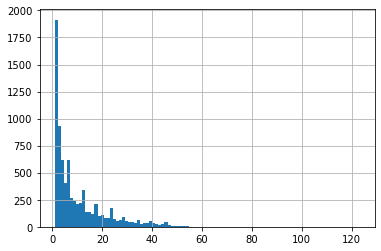

In [20]:
df['tweets_length'].hist(bins=100)

In [47]:
list(df[df['hashtags_length']> 3]['text'])

['#DelcyCabello @PGN_COL, #INDRA, #TibisayVega @Registraduria @CNE_COLOMBIA y @consejodeestado pondrán el presidente que les ordenó el #Anticristo #Farcsantos\n\n#FeEnLaCausa mi general @COMANDANTE_EJC\n#NosUnimosONosJodemos\n #FedericoEsColombia https://t.co/7oOO9swiZk',
 '@jarizabaletaf #FedericoEsColombia\n#FedericoEsColombia\n#FedericoEsColombia\n#FedericoEsColombia',
 '@jarizabaletaf #FedericoEsColombia\n#FedericoEsColombia\nBarranquilla, Cúcuta, Santa Marta, Montería.\n#FedericoEsColombia\n#FedericoEsColombia',
 '#DelcyCabello @PGN_COL, #INDRA, #TibisayVega @Registraduria @CNE_COLOMBIA y @consejodeestado pondrán el presidente que les ordenó el #Anticristo #Farcsantos\n\n#FeEnLaCausa mi general @COMANDANTE_EJC\n#NosUnimosONosJodemos\n #FedericoEsColombia #APOTEÓFICO!! https://t.co/FgyO7Mv3kI',
 '#FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #FedericoEsColombia #Federic